In [ ]:
##Let's regress SalePrice onto LotArea to start with

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from IPython.display import display

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

dftrain = pd.read_csv("train.csv", engine='python')
dftest = pd.read_csv("test.csv", engine='python')
print(dftrain.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

In [ ]:
# dftrain.shape

In [ ]:
# dftrain.sample(10)

In [ ]:
# dftrain.info(5)

In [ ]:
# dftrain['SalePrice'].head()

In [ ]:
# report = pandas_profiling.ProfileReport(dftrain)
# report

In [ ]:
# df_num = dftrain.select_dtypes(include = ['float64', 'int64'])
# df_num.head()

In [ ]:
# df_object = dftrain.select_dtypes(include = ['object'])
# df_num.head()

In [ ]:
# df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
# golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
# print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

In [ ]:
# dftrain['AreaBin'] = pd.cut(dftrain.LotArea, 20, labels=False)
# # Using another column other than age is also OK because we just need the count
# X = dftrain.groupby('AreaBin')[['LotArea', 'LotFrontage']].agg({'LotArea':'mean', 'LotFrontage':'count'})
# X.columns = ['LotArea', 'count']

In [ ]:
# for i in range(0, len(df_num.columns), 5):
#     sns.pairplot(data=df_num,
#                 x_vars=df_num.columns[i:i+5],
#                 y_vars=['SalePrice'])

In [ ]:
# print(dftrain['SalePrice'].describe())
# plt.figure(figsize=(9, 8))
# sns.distplot(dftrain['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
##SalePrice distribution, and normalized
##Probability plot, and normalized

# from scipy import stats
# from scipy.stats import norm, skew #for some statistics

# # Plot histogram and probability
# fig = plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# sns.distplot(df_num['SalePrice'] , fit=norm);
# (mu, sigma) = norm.fit(df_num['SalePrice'])
# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#             loc='best')
# plt.ylabel('Frequency')
# plt.title('SalePrice distribution')
# plt.subplot(1,2,2)
# res = stats.probplot(df_num['SalePrice'], plot=plt)
# plt.suptitle('Before transformation')

# # Apply transformation
# df_num.SalePrice = np.log1p(df_num.SalePrice)
# # New prediction
# y_train = df_num.SalePrice.values
# y_train_orig = df_num.SalePrice


# # Plot histogram and probability after transformation
# fig = plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# sns.distplot(df_num['SalePrice'] , fit=norm);
# (mu, sigma) = norm.fit(df_num['SalePrice'])
# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#             loc='best')
# plt.ylabel('Frequency')
# plt.title('SalePrice distribution')
# plt.subplot(1,2,2)
# res = stats.probplot(df_num['SalePrice'], plot=plt)
# plt.suptitle('After transformation')

In [ ]:
# np.unique(dftrain.dtypes)

In [ ]:
# train_float = dftrain.select_dtypes(include = ['float64'])
# test_float = dftest.select_dtypes(include = ['float64'])
# train_float.dtypes

In [ ]:
# #heatmap correlation matrix
# corrmat = dftrain.corr()
# f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
# dftrain_corr = dftrain.select_dtypes(include=[np.number])

In [ ]:
# dftrain_corr.shape

In [ ]:
# del dftrain_corr['Id']

In [ ]:
# corr = dftrain_corr.corr()
# plt.subplots(figsize=(20,9))
# sns.heatmap(corr, annot=True)

In [ ]:
# ##Top 50 corr
# top_feature = corr.index[abs(corr['SalePrice']>0.5)]
# plt.subplots(figsize=(12, 8))
# top_corr = dftrain[top_feature].corr()
# sns.heatmap(top_corr, annot=True)
# plt.show()

In [ ]:
## Cleaning data

In [2]:
dftrain.isna().sum().head()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage    259
LotArea          0
dtype: int64

In [3]:
##Proportion of NaNs within columns
Isnull = dftrain.isnull().sum()/len(dftrain)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending = False)
Isnull

PoolQC         99.521
MiscFeature    96.301
Alley          93.767
Fence          80.753
FireplaceQu    47.260
LotFrontage    17.740
GarageYrBlt     5.548
GarageType      5.548
GarageFinish    5.548
GarageQual      5.548
GarageCond      5.548
BsmtFinType2    2.603
BsmtExposure    2.603
BsmtFinType1    2.534
BsmtCond        2.534
BsmtQual        2.534
MasVnrArea      0.548
MasVnrType      0.548
Electrical      0.068
dtype: float64

In [4]:
# Run from here

In [5]:
## Dropping columns and rows

In [6]:
# Dropping Utilities; is useless
dftrain.drop(['Utilities'], axis=1,inplace=True)

In [7]:
## Dropping 'PoolQC' for having too many NaNs; 
dftrain.drop(['PoolQC'],axis=1,inplace=True)

In [8]:
## Dropping 'Fence' for having too many NaNs; 
dftrain.drop(['Fence'],axis=1,inplace=True)

In [9]:
## Dropping MiscFeature' for having too many NaNs; 
dftrain.drop(['MiscFeature'],axis=1,inplace=True)

In [10]:
## Dropping 'Alley' for same reason
dftrain.drop(['Alley'],axis=1,inplace=True)

In [11]:
## Dropping 'GarageYrBlt' - highly colinear with 'YearBuilt'; also has many NaNs
dftrain.drop(['GarageYrBlt'],axis=1,inplace=True)

In [12]:
## Dropping Id; is useless
dftrain.drop(['Id'],axis=1,inplace=True)

In [13]:
## Dropping outliers
dftrain = dftrain[dftrain.GrLivArea < 4000]

In [14]:
dftrain.shape

(1456, 74)

In [15]:
## Imputing values

In [16]:
## Imputing BsmtCond and BsmtQual by mode
dftrain['BsmtCond']=dftrain['BsmtCond'].fillna(dftrain['BsmtCond'].mode()[0])
dftrain['BsmtQual']=dftrain['BsmtQual'].fillna(dftrain['BsmtQual'].mode()[0])

In [17]:
##GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
# for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
#     dftrain[col] = dftrain[col].fillna('None')
## Revised approach: imputing garage variables
dftrain['GarageFinish']=dftrain['GarageFinish'].fillna(dftrain['GarageFinish'].mode()[0])
dftrain['GarageQual']=dftrain['GarageQual'].fillna(dftrain['GarageQual'].mode()[0])
dftrain['GarageCond']=dftrain['GarageCond'].fillna(dftrain['GarageCond'].mode()[0])
dftrain['GarageType']=dftrain['GarageType'].fillna(dftrain['GarageType'].mode()[0])

In [18]:
## 'FireplaceQu' comes in under the 50% NaN threshold for dropping a column; however, will keep this variable in mind when testing. Imputation could skew final result
dftrain['FireplaceQu']=dftrain['FireplaceQu'].fillna(dftrain['FireplaceQu'].mode()[0])

In [19]:
# ##Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
# dftrain['LotFrontage'] = dftrain.groupby("Neighborhood")["LotFrontage"].transform(
#     lambda x: x.fillna(x.median()))
## Reimputing LotFrontage this way:
dftrain['LotFrontage']=dftrain['LotFrontage'].fillna(dftrain['LotFrontage'].mean())

In [20]:
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
# for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
#     dftrain[col] = dftrain[col].fillna('None')
## Trying imputation: Filling with 'None' method doesn't work
dftrain['BsmtExposure']=dftrain['BsmtExposure'].fillna(dftrain['BsmtExposure'].mode()[0])
# dftrain['BsmtFinType1']=dftrain['BsmtFinType1'].fillna(dftrain['BsmtFinType1'].mode()[0])
dftrain['BsmtFinType2']=dftrain['BsmtFinType2'].fillna(dftrain['BsmtFinType2'].mode()[0])
dftrain['BsmtQual']=dftrain['BsmtQual'].fillna(dftrain['BsmtQual'].mode()[0])
dftrain['BsmtCond']=dftrain['BsmtCond'].fillna(dftrain['BsmtCond'].mode()[0])

In [21]:
# MasVnrType and MasVnrArea: replace with 0
dftrain['MasVnrArea'] = dftrain['MasVnrArea'].fillna(dftrain['MasVnrArea'].mode()[0])
dftrain['MasVnrType'] = dftrain['MasVnrType'].fillna(dftrain['MasVnrType'].mode()[0])

In [22]:
## Imputing 'Electrical' with mode
# dftrain['Electrical'] = dftrain['Electrical'].fillna(dftrain['Electrical']).mode()[0]

In [23]:
# #GarageYrBlt, GarageArea and GarageCars these are replacing with zero
# for col in ['GarageArea', 'GarageCars']:
#     dftrain[col] = dftrain[col].fillna(int(0))

In [24]:
dftrain.shape

(1456, 74)

In [25]:
##Proportion of NaNs within columns
Isnull = dftrain.isnull().sum()/len(dftrain)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending = False)
Isnull

BsmtFinType1   2.541
Electrical     0.069
dtype: float64

In [26]:
## Dropping final NaNs
dftrain.dropna(inplace=True)

In [27]:
dftrain.shape

(1418, 74)

In [28]:
##Proportion of NaNs within columns; checking to be sure NaNs are gone
Isnull = dftrain.isnull().sum()/len(dftrain)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending = False)
Isnull

Series([], dtype: float64)

In [29]:
dftrain.to_csv('RFtest.csv',index=False)

In [30]:
## New features

In [31]:
dftrain.SalePrice = np.log1p(dftrain.SalePrice)
y = dftrain.SalePrice

In [32]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = dftrain.select_dtypes(include = ["object"]).columns
numerical_features = dftrain.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
dftrain_num = dftrain[numerical_features]
dftrain_cat = dftrain[categorical_features]

Numerical features : 35
Categorical features : 38


In [33]:
# Handle remaining missing values for numerical features by using median as replacement
print("NAs for numerical features in train : " + str(dftrain_num.isnull().values.sum()))
dftrain_num = dftrain_num.fillna(dftrain_num.median())
print("Remaining NAs for numerical features in train : " + str(dftrain_num.isnull().values.sum()))

NAs for numerical features in train : 0
Remaining NAs for numerical features in train : 0


In [34]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = dftrain_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
dftrain_num[skewed_features] = np.log1p(dftrain_num[skewed_features])

28 skewed numerical features to log transform


In [35]:
# Dummification
print("NAs for categorical features in train : " + str(dftrain_cat.isnull().values.sum()))
dftrain_cat = pd.get_dummies(dftrain_cat)
print("Remaining NAs for categorical features in train : " + str(dftrain_cat.isnull().values.sum()))


NAs for categorical features in train : 0
Remaining NAs for categorical features in train : 0


In [36]:
# Concatenates the categoral and numericals
dftrain = pd.concat([dftrain_num, dftrain_cat], axis=1)
print("New number of features : " + str(dftrain.shape[1]))


New number of features : 267


In [37]:
dftrain

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.111,4.190,9.042,7,1.792,7.603,7.603,5.283,6.561,0.000,...,0,0,0,1,0,0,0,0,1,0
1,3.045,4.394,9.170,6,2.197,7.589,7.589,0.000,6.887,0.000,...,0,0,0,1,0,0,0,0,1,0
2,4.111,4.234,9.328,7,1.792,7.602,7.602,5.094,6.188,0.000,...,0,0,0,1,0,0,0,0,1,0
3,4.263,4.111,9.164,7,1.792,7.558,7.586,0.000,5.380,0.000,...,0,0,0,1,1,0,0,0,0,0
4,4.111,4.443,9.565,8,1.792,7.601,7.601,5.861,6.486,0.000,...,0,0,0,1,0,0,0,0,1,0
5,3.932,4.454,9.555,5,1.792,7.598,7.599,0.000,6.597,0.000,...,0,0,0,1,0,0,0,0,1,0
6,3.045,4.331,9.219,8,1.792,7.603,7.604,5.231,7.223,0.000,...,0,0,0,1,0,0,0,0,1,0
7,4.111,4.258,9.248,7,1.946,7.588,7.588,5.485,6.757,3.497,...,0,0,0,1,0,0,0,0,1,0
8,3.932,3.951,8.719,7,1.792,7.566,7.576,0.000,0.000,0.000,...,0,0,0,1,1,0,0,0,0,0
9,5.252,3.932,8.912,5,1.946,7.570,7.576,0.000,6.748,0.000,...,0,0,0,1,0,0,0,0,1,0


In [38]:
## Separates into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(dftrain, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (992, 267)
X_test : (426, 267)
y_train : (992,)
y_test : (426,)


In [39]:
# Standardize
stdSc = StandardScaler()
X_train.loc[:, numerical_features] = stdSc.fit_transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = stdSc.transform(X_test.loc[:, numerical_features])

/home/arlisscoates/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [40]:
# Define error measure for official scoring : RMSE
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import mean_squared_error

scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

In [41]:
# Simple linear regression

RMSE on Training set : 2242806585.9927626
RMSE on Test set : 73969597276.75879


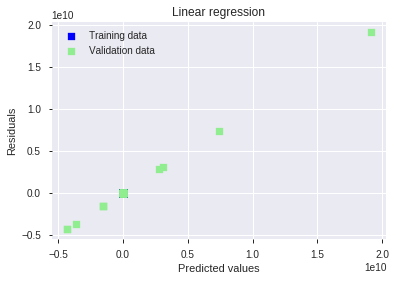

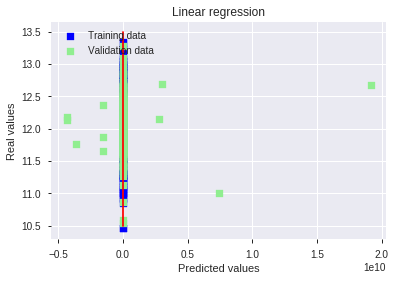

In [42]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [43]:
# Linear regression with regularization

Best alpha : 10.0
Try again for more precision with alphas centered around 10.0
Best alpha : 11.5
Ridge RMSE on Training set : 0.10847684130821082
Ridge RMSE on Test set : 0.1221650668197501


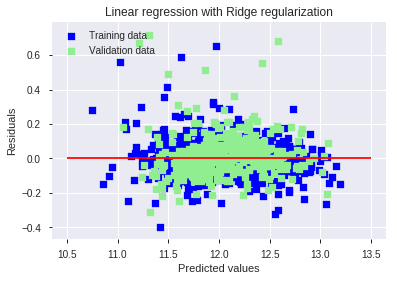

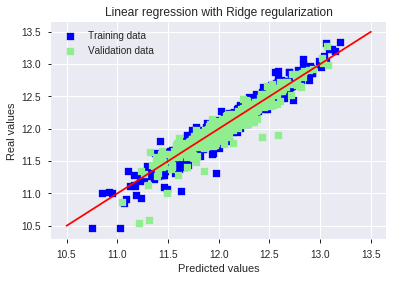

Ridge picked 261 features and eliminated the other 6 features


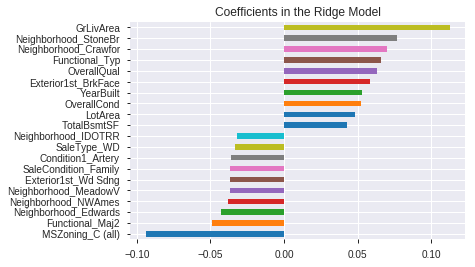

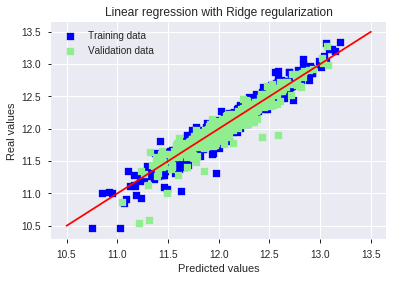

Ridge picked 261 features and eliminated the other 6 features


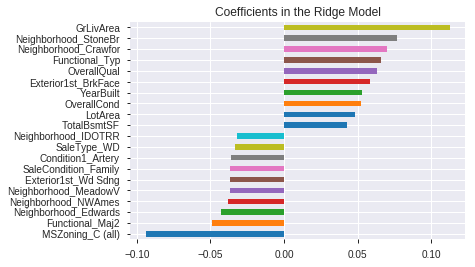

In [44]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

In [45]:
#  LASSO regression

Best alpha : 0.0003
Try again for more precision with alphas centered around 0.0003
Best alpha : 0.000405
Lasso RMSE on Training set : 0.10752041012008347
Lasso RMSE on Test set : 0.13172648594917163


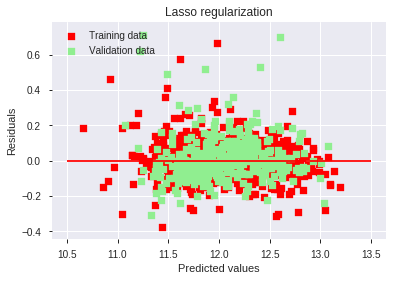

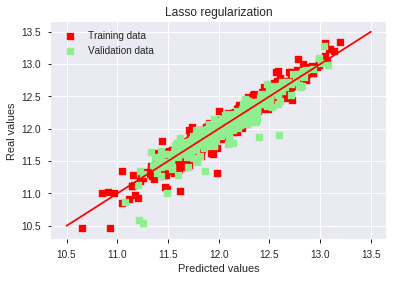

Lasso picked 112 features and eliminated the other 155 features


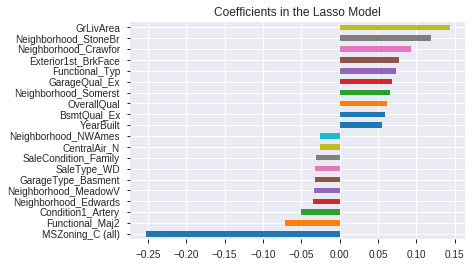

In [46]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "red", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = "red", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

Best l1_ratio : 0.6
Best alpha : 0.0006
Try again for more precision with l1_ratio centered around 0.6
Best l1_ratio : 0.66
Best alpha : 0.0006
Now try again for more precision on alpha, with l1_ratio fixed at 0.66 and alpha centered around 0.0006
Best l1_ratio : 0.66
Best alpha : 0.0006
ElasticNet RMSE on Training set : 0.10766735614342697
ElasticNet RMSE on Test set : 0.13091078451120186


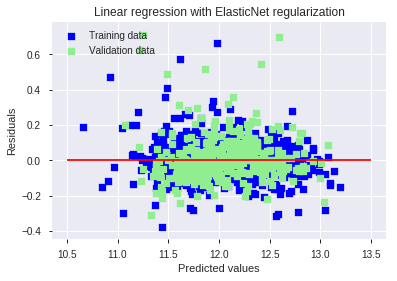

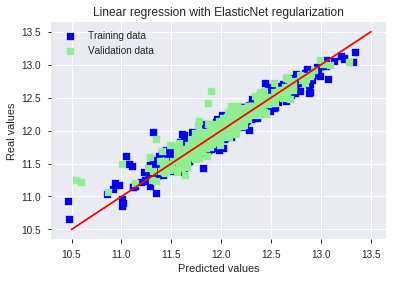

ElasticNet picked 114 features and eliminated the other 153 features


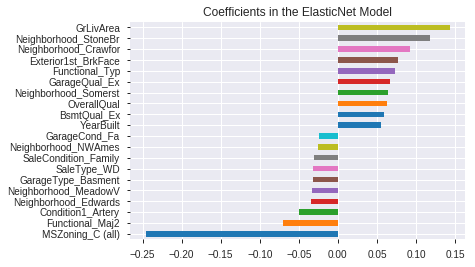

In [47]:
# Elasticnet

elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())
y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)

# Plot residuals
plt.scatter(y_train_ela, y_train_ela - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_ela, y_test_ela - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train, y_train_ela, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, y_test_ela, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

In [48]:
# Random forest

In [49]:
def get_error(X_train, y_train, X_test, y_test, model, show = True):
    model.fit(X_train, y_train)
    train_error = 1 - model.score(X_train, y_train)
    test_error  = 1 - model.score(X_test, y_test)
    if show:
        print("The training error is: %.5f" %train_error)
        print("The test     error is: %.5f" %test_error)
    return [train_error, test_error]

In [50]:
grid_para_tree = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 31)}

In [51]:
X_train, X_test, y_train, y_test = train_test_split(dftrain_cat, oj_target, test_size=0.2, random_state=0)

NameError: name 'oj_target' is not defined

In [ ]:
# (1) fit the initial model on the training set
from sklearn import tree
tree_model = tree.DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
print("Training error: " + str(1-tree_model.score(X_train, y_train)))
print("Test error: " + str(1-tree_model.score(X_test, y_test)))

In [ ]:
# or using get_error function for automatic computation
from sklearn import tree
tree_model = tree.DecisionTreeRegressor()
get_error(X_train, y_train, X_test, y_test, tree_model)

In [ ]:
import sklearn.model_selection as ms
#run a grid search to find error rates for max_depths ranging 1-30
grid_para_tree = [
    {'max_depth': range(1, 31)}
]

tree_model.set_params(random_state=0)
grid_search_tree = ms.GridSearchCV(tree_model, grid_para_tree, scoring='accuracy', cv=5, n_jobs=-1, return_train_score=True)
grid_search_tree.fit(X_train, y_train)

In [ ]:
# create lists of the test/training error ranges
test_error_range  = [1 - x for x in grid_search_tree.cv_results_['mean_test_score']]
train_error_range = [1 - x for x in grid_search_tree.cv_results_['mean_train_score']]

In [ ]:
print("Most important features to SalePrice")
corr = dftrain.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

In [ ]:
## Dealing with the categoricals

In [ ]:
columns=['MSZoning','Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [ ]:
len(columns)

In [ ]:
## Converts categorical variables to dummy values

def category_onehot_multcols(multcolumns):
    df_final=dfcombined
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(dfcombined[fields],drop_first=True)
        
        dfcombined.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([dfcombined,df_final],axis=1)
        
    return df_final

In [ ]:
main_df=dftrain.copy()

In [ ]:
## Combining Test Data 

In [ ]:
df_test=pd.read_csv('formulatedtest.csv')

In [ ]:
## Checking to see if it matches .shape in test_data_cleaning
df_test.shape

In [ ]:
df_test.head()

In [ ]:
dfcombined=pd.concat([dftrain,df_test],axis=0)

In [ ]:
dfcombined.shape

In [ ]:
dfcombined=category_onehot_multcols(columns)

In [ ]:
dfcombined.shape

In [ ]:
## Removes duplicate columns
dfcombined =dfcombined.loc[:,~dfcombined.columns.duplicated()]

In [ ]:
df_Train=dfcombined.iloc[:1418,:]
df_Test=dfcombined.iloc[1418:,:]
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [ ]:
dfcombined.shape

In [ ]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [ ]:
fig, ax = plt.subplots()
ax= sns.regplot(df_Train['GrLivArea'], df_Train['SalePrice'], scatter_kws={"color": "firebrick", 's': 10}, line_kws={"color": "red"})
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [ ]:
train = df_Train.drop(df_Train[(df_Train['GrLivArea']>4000) & (df_Train['SalePrice']<300000)].index)

In [ ]:
fig, ax = plt.subplots()
ax = sns.regplot(train['GrLivArea'], train['SalePrice'], scatter_kws={'s': 10})
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [ ]:
#lm2 = LinearRegression()
#sale2 = dftrain.loc[~dftrain.isnull().any(axis=1)] # how to remove the rows with missingness
#lm2.fit(dftrain[['SalePrice']], dftrain['GrLivArea'])
#print('intercept %.2f' %(lm2.intercept_))
#print('slope %.4f' %(lm2.coef_))

In [ ]:
lm2 = LinearRegression()
sale2 = dftrain.loc[~dftrain.isnull().any(axis=1)] # how to remove the rows with missingness
lm2.fit(dftrain[['GrLivArea']], dftrain['SalePrice'])
print('intercept %.2f' %(lm2.intercept_))
print('slope %.4f' %(lm2.coef_))

In [ ]:
import statsmodels.api as sm
from statsmodels.api import OLS

In [ ]:
features = sm.add_constant(df_Train[['GrLivArea']])
ols_sm   = OLS(df_Train.SalePrice, features)
model    = ols_sm.fit()

In [ ]:
print(model.summary())

In [ ]:
# Ridge

In [ ]:
df_Train.columns

In [ ]:
df_Train_dummy = df_Train[['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'AreaBin', 'BedroomAbvGr',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'Min1', 'Min2', 'Typ', 'Attchd', 'Basment', 'BuiltIn', 'CarPort',
       'Detchd', 'RFn', 'P','SalePrice']]

In [ ]:
SalePrice_dummy = df_Train.SalePrice
df_Train_dummy = df_Train_dummy.drop('SalePrice', axis=1)

In [ ]:
SalePrice = df_Train.SalePrice
df_Train = df_Train.drop('SalePrice', axis=1)

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

In [ ]:
ridge.set_params(alpha=1.0)
ridge.fit(df_Train, SalePrice)
ridge.score(df_Train, SalePrice)

In [ ]:
coefs = []
intercepts = []
R2  = []
alphaRange = np.linspace(1e-3,200,20)
for alpha in alphaRange:
    ridge.set_params(alpha=alpha)  
    ridge.fit(df_Train, saleprice)
    intercepts.append(ridge.intercept_)
    coefs.append(ridge.coef_)
    R2.append(ridge.score(df_Train, saleprice))  

In [ ]:
plt.plot(alphaRange, intercepts)
plt.title('Change of Ridge Intercept Varying Alpha')

In [ ]:
## Why is this inverse?

In [ ]:
coefs = pd.DataFrame(np.array(coefs), columns=df_Train.columns)

for name in coefs.columns:
    plt.plot(alphaRange, coefs[name], label=name)
plt.legend(loc=1)    
plt.title('Change of Ridge Slopes Varying Alpha')

In [ ]:
plt.plot(alphaRange, R2)
plt.title(r'Change of $R^2$ Varying Alphas')

In [ ]:
np.random.seed(1)
testIdxes = np.random.choice(range(117), size= 35, replace=False)
trainIdxes = list(set(range(117))-set(testIdxes))
trainX = df_Train_dummy.iloc[trainIdxes]
testX  = df_Train_dummy.iloc[testIdxes]
trainY = SalePrice_dummy.iloc[trainIdxes]
testY  = SalePrice_dummy.iloc[testIdxes]

In [ ]:
train_R2 = []
test_R2  = []
alphaRange = np.linspace(1e-3,200,20)
for alpha in alphaRange:
    ridge.set_params(alpha=alpha, normalize=False)  
    ridge.fit(trainX, trainY)
    train_R2.append(ridge.score(trainX, trainY))
    test_R2.append(ridge.score(testX, testY))

In [ ]:
plt.plot(alphaRange, train_R2, label=r'train set $R^2$')
plt.plot(alphaRange, test_R2, label=r'test set $R^2$')
plt.legend(loc=4)

In [ ]:
ridge.set_params(alpha=45)
ridge.fit(utility, totalbill)
coefDF = pd.Series(ridge.coef_, index=utility.columns)
print('The intercept is %.4f' %(ridge.intercept_))
print('The slopes are %s' %(coefDF))

In [ ]:
# LASSO